In [1]:
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_94/2179033463.py:13: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


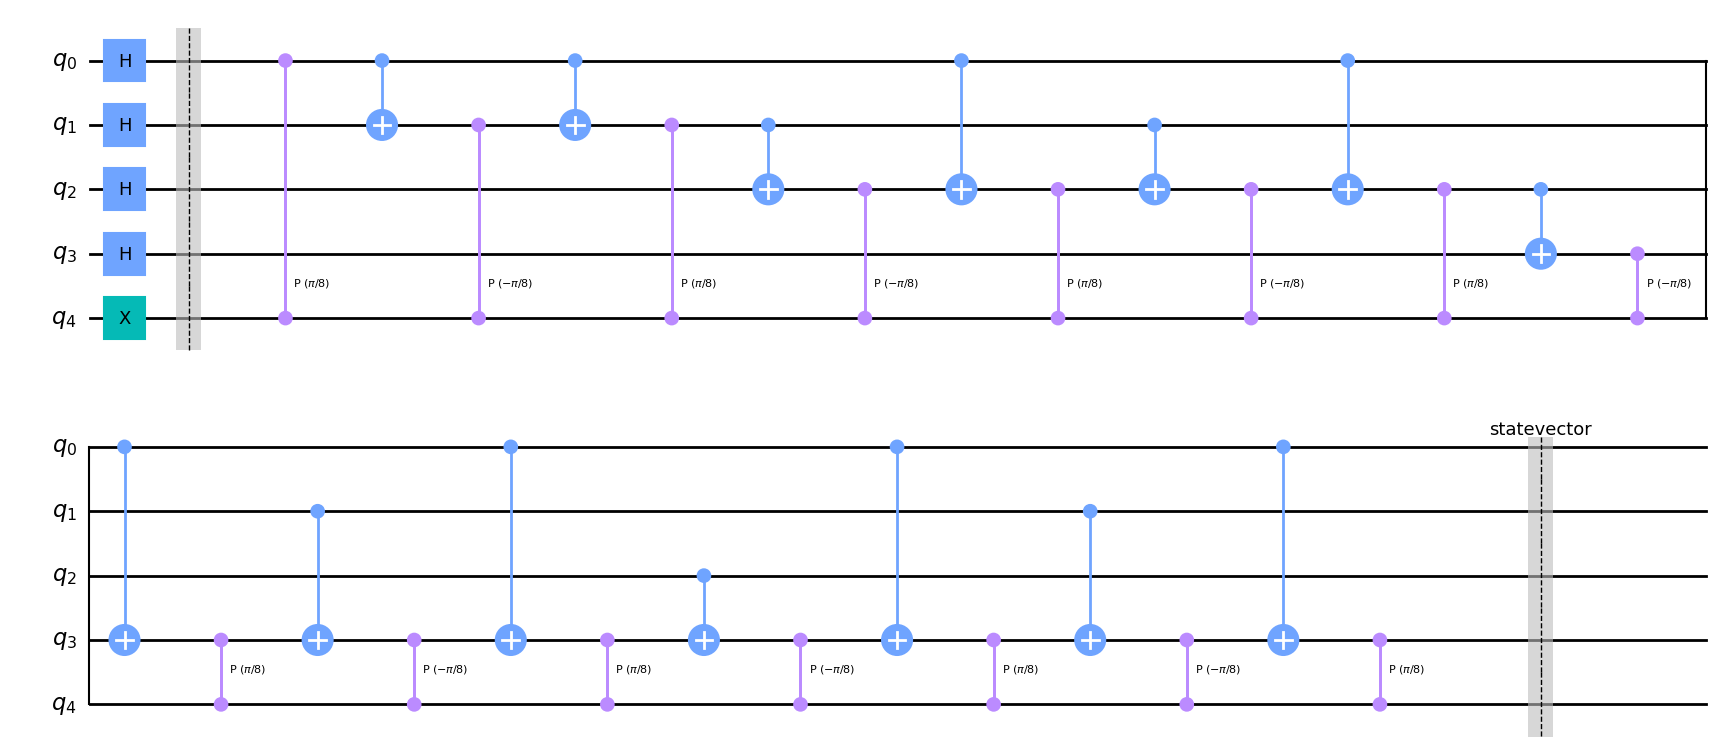

In [2]:
# We're going to hard code a C4Z gate. We'll generalize it to n inputs later.
theta = np.pi / 8

q_c4z = QuantumCircuit(5)

for i in range(4):
    q_c4z.h(i)

q_c4z.x(4)

q_c4z.barrier()

q_c4z.cp(theta, 0, 4)
q_c4z.cx(0, 1)
q_c4z.cp(-theta, 1, 4)
q_c4z.cx(0, 1)
q_c4z.cp(theta, 1, 4)
q_c4z.cx(1, 2)
q_c4z.cp(-theta, 2, 4)
q_c4z.cx(0, 2)
q_c4z.cp(theta, 2, 4)
q_c4z.cx(1, 2)
q_c4z.cp(-theta, 2, 4)
q_c4z.cx(0, 2)
q_c4z.cp(theta, 2, 4)
q_c4z.cx(2, 3)
q_c4z.cp(-theta, 3, 4)
q_c4z.cx(0, 3)
q_c4z.cp(theta, 3, 4)
q_c4z.cx(1, 3)
q_c4z.cp(-theta, 3, 4)
q_c4z.cx(0,3)
q_c4z.cp(theta, 3, 4)
q_c4z.cx(2,3)
q_c4z.cp(-theta, 3, 4)
q_c4z.cx(0,3)
q_c4z.cp(theta, 3, 4)
q_c4z.cx(1, 3)
q_c4z.cp(-theta, 3, 4)
q_c4z.cx(0, 3)
q_c4z.cp(theta, 3, 4)

q_c4z.save_statevector()

q_c4z.draw()


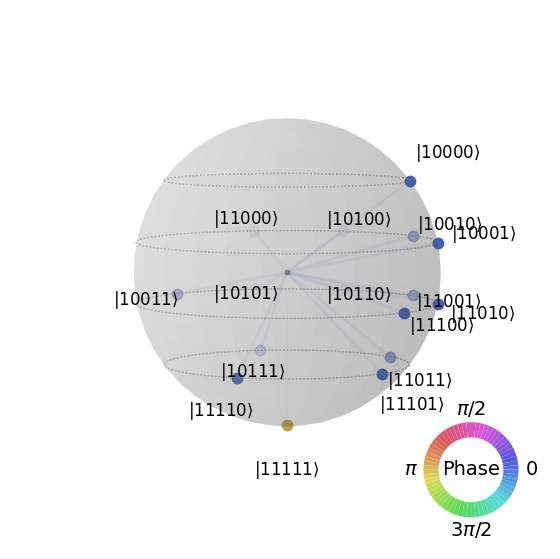

In [3]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
q_c4z = transpile(q_c4z, simulator)

# Run and get statevector
result = simulator.run(q_c4z).result()
statevector = result.get_statevector(q_c4z)
plot_state_qsphere(statevector)

In [4]:
def generate_gray(n):
    if( n == 1 ):
        return ['0','1']
    
    gray_n_minus_one = generate_gray( (n-1) )
    gray_n_minus_one_reverse = generate_gray( (n-1) )
    gray_n_minus_one_reverse.reverse()
    
    gray_n_minus_one = ['0' + x for x in gray_n_minus_one]
    gray_n_minus_one_reverse = ['1' + x for x in gray_n_minus_one_reverse]
    
    return gray_n_minus_one + gray_n_minus_one_reverse

def cnZ(n):
    q_cnz = QuantumCircuit( (n+1) )
    

In [5]:
gray_temp = generate_gray(4)
gray_final = []

zero_element = ''
for i in range(4):
    zero_element = zero_element + '0'
    
gray_temp.remove(zero_element)

def reverse_string(string):
    #print("String: ", string)
    string = list(string)
    string.reverse()
    #print("String Reverse:" , string)
    #print("Return value: ", ''.join(string))
    return ''.join(string)

for i in gray_temp:
    gray_final.append(reverse_string(i))

def modify_gray(gray_init, n):
    gray_final = []
    zero_element = ''
    for i in range(4):
        zero_element = zero_element + '0'
    
    gray_init.remove(zero_element)
    
    for i in gray_init:
        gray_final.append(reverse_string(i))
    
    return(gray_final)  

In [6]:
def get_gray_diff(first, second, n):
    diff_index = 0
    for i in range(n):
        if(first[i] != second[i]):
            diff_index = i
            break
    
    return diff_index

In [41]:
def get_rightmost_one(gray_code_term, n):
    print("get_rightmost_one called! | term: ", gray_code_term, " | n: ", n)
    for i in range( (n-1), -1, -1):
        if(gray_code_term[i] == '1'):
            return i
    
    return 0

def get_second_rightmost_one(gray_code_term, rightmost_term, n):
    print("get_sr! term: ", gray_code_term, " | n: ", n)
    for i in range( (rightmost_term - 1), -1, -1):
        if(gray_code_term[i] == '1'):
            return i
        
    return 0

get_gray_diff('1111', '1110', 4)

3

['1000', '1100', '0100', '0110', '1110', '1010', '0010', '0011', '1011', '1111', '0111', '0101', '1101', '1001', '0001']
Current Iteration:  1 Gray Code:  1100
RIGHTMOSTONE CALLED! term:  1100  | n:  4
changing index:  1  | rightmost index:  1
checking
RIGHTMOSTONE CALLED! term:  1100  | n:  4
Current Iteration:  2 Gray Code:  0100
RIGHTMOSTONE CALLED! term:  0100  | n:  4
changing index:  0  | rightmost index:  1
checking
Current Iteration:  3 Gray Code:  0110
RIGHTMOSTONE CALLED! term:  0110  | n:  4
changing index:  2  | rightmost index:  2
checking
RIGHTMOSTONE CALLED! term:  0110  | n:  4
Current Iteration:  4 Gray Code:  1110
RIGHTMOSTONE CALLED! term:  1110  | n:  4
changing index:  0  | rightmost index:  2
checking
Current Iteration:  5 Gray Code:  1010
RIGHTMOSTONE CALLED! term:  1010  | n:  4
changing index:  1  | rightmost index:  2
checking
Current Iteration:  6 Gray Code:  0010
RIGHTMOSTONE CALLED! term:  0010  | n:  4
changing index:  0  | rightmost index:  2
checking
Cur

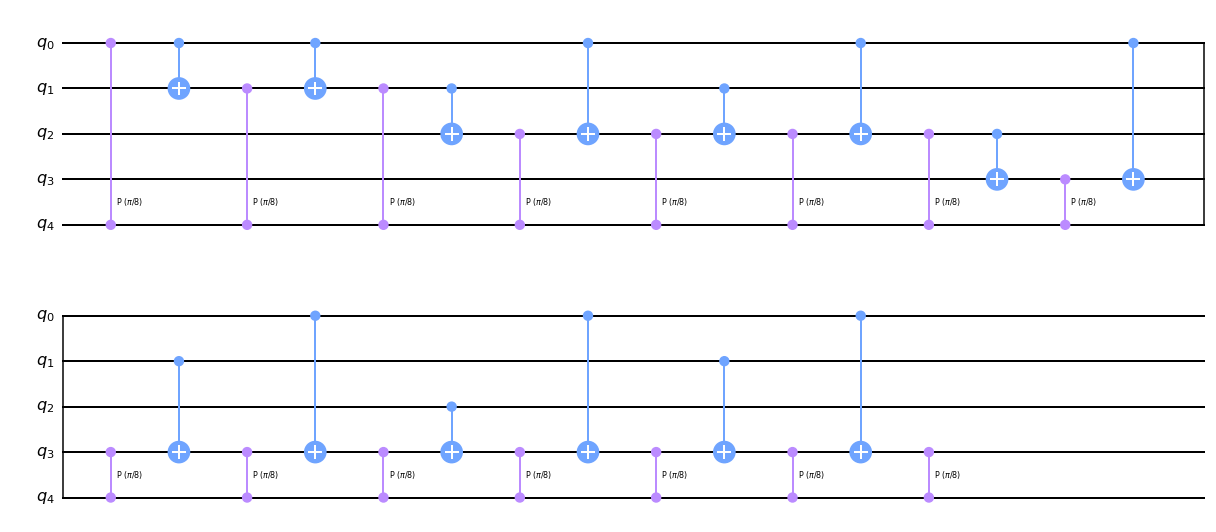

In [46]:
n = 4

q_temp = QuantumCircuit( (n + 1) )

theta = np.pi / 8

gray_code_temp = generate_gray(n)
gray_code = modify_gray(gray_code_temp, n)

print(gray_code)


current_index = 0
for i in range( len(gray_code) ):
    if (i == 0):
        current_index = 0
        q_temp.cp(theta, 0, n)
        continue
    print("Current Iteration: ", i, "Gray Code: ", gray_code[i])
    
    changing_index = get_gray_diff(gray_code[ (i - 1) ], gray_code[i], n)
    rightmost_index = get_rightmost_one(gray_code[i], n)
    
    print("changing index: ", changing_index, " | rightmost index: ", rightmost_index)
    print("checking")
    
    if(changing_index == rightmost_index):
        gray_code_copy = gray_code[i]
        target_index = rightmost_index
        source_index = get_second_rightmost_one(gray_code[i], rightmost_index, n)
        #print("* target index: ", target_index, " | source index: ", source_index)
    else:
        target_index = rightmost_index
        source_index = changing_index
        #print("target index: ", target_index, " | source index: ", source_index)
    
    q_temp.cx(source_index, target_index)
    q_temp.cp(theta, target_index, n)
    
        
q_temp.draw()

In [ ]:
n = 4

q_temp = QuantumCircuit( (n + 1) )

theta = np.pi / 8

gray_code_temp = generate_gray(n)
gray_code = modify_gray(gray_code_temp, n)

print(gray_code)


current_index = 0
for i in range( len(gray_code) ):
    if (i == 0):
        current_index = 0
        q_temp.cp(theta, 0, n)
        continue
    print("Current Iteration: ", i, "Gray Code: ", gray_code[i])
    
    changing_index = get_gray_diff(gray_code[ (i - 1) ], gray_code[i], n)
    rightmost_index = get_rightmost_one(gray_code[i], n)
    
    print("changing index: ", changing_index, " | rightmost index: ", rightmost_index)
    print("checking")
    
    if(changing_index == rightmost_index):
        gray_code_copy = gray_code[i]
        target_index = rightmost_index
        source_index = get_second_rightmost_one(gray_code[i], rightmost_index, n)
        #print("* target index: ", target_index, " | source index: ", source_index)
    else:
        target_index = rightmost_index
        source_index = changing_index
        #print("target index: ", target_index, " | source index: ", source_index)
    
    q_temp.cx(source_index, target_index)
    q_temp.cp(theta, target_index, n)
    
        
q_temp.draw()

In [6]:
def get_rightmost_one(gray_code_term, n):
    for i in range( (n-1), -1, -1):
        if(gray_code_term[i] == '1'):
            return i
    
    return 0

def get_second_rightmost_one(gray_code_term, rightmost_term, n):
    for i in range( (rightmost_term - 1), -1, -1):
        if(gray_code_term[i] == '1'):
            return i
        
    return 0

def reverse_string(string):
    #print("String: ", string)
    string = list(string)
    string.reverse()
    #print("String Reverse:" , string)
    #print("Return value: ", ''.join(string))
    return ''.join(string)

def modify_gray(gray_init, n):
    gray_final = []
    zero_element = ''
    for i in range(n):
        zero_element = zero_element + '0'
    
    gray_init.remove(zero_element)
    
    for i in gray_init:
        gray_final.append(reverse_string(i))
    
    return(gray_final)

def generate_gray(n):
    if( n == 1 ):
        return ['0','1']
    
    gray_n_minus_one = generate_gray( (n-1) )
    gray_n_minus_one_reverse = generate_gray( (n-1) )
    gray_n_minus_one_reverse.reverse()
    
    gray_n_minus_one = ['0' + x for x in gray_n_minus_one]
    gray_n_minus_one_reverse = ['1' + x for x in gray_n_minus_one_reverse]
    
    return gray_n_minus_one + gray_n_minus_one_reverse

def get_gray_diff(first, second, n):
    diff_index = 0
    for i in range(n):
        if(first[i] != second[i]):
            diff_index = i
            break
    
    return diff_index

def qncz(n):
    qncz = QuantumCircuit( (n + 1) )
    
    theta = np.pi / (2**(n - 1))
    
    gray_code_temp = generate_gray(n)
    gray_code = modify_gray(gray_code_temp, n)
    
    for i in range( len(gray_code) ):
        if (i == 0):
            current_index = 0
            qncz.cp(theta, 0, n)
            theta = -theta
            continue
        
        #print("Current Iteration: ", i, "Gray Code: ", gray_code[i])
    
        changing_index = get_gray_diff(gray_code[ (i - 1) ], gray_code[i], n)
        rightmost_index = get_rightmost_one(gray_code[i], n)
    
        #print("changing index: ", changing_index, " | rightmost index: ", rightmost_index)
        #print("checking")
    
        if(changing_index == rightmost_index):
            gray_code_copy = gray_code[i]
            target_index = rightmost_index
            source_index = get_second_rightmost_one(gray_code[i], rightmost_index, n)
            #print("* target index: ", target_index, " | source index: ", source_index)
        else:
            target_index = rightmost_index
            source_index = changing_index
            #print("target index: ", target_index, " | source index: ", source_index)
    
        qncz.cx(source_index, target_index)
        qncz.cp(theta, target_index, n)    
        theta = -theta

    qncz = qncz.to_gate()
    qncz.name = "  %iCZ" % n
    return qncz


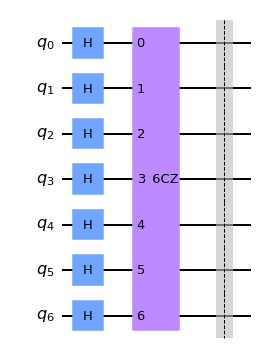

In [7]:
qc = QuantumCircuit(7)
for i in range(7):
    qc.h(i)
qc.append(qncz(6), range(7))
qc.save_statevector()
qc.draw()

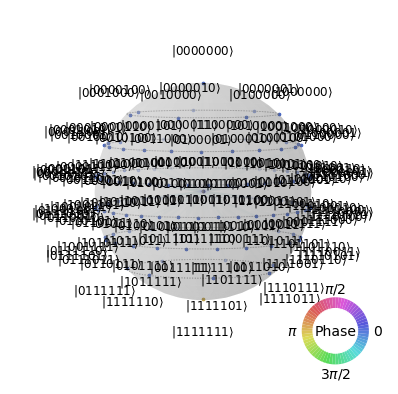

In [8]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_state_qsphere(statevector)